# **Import Libraries**

In [153]:
import tensorflow as tf
import os 
import numpy as np
import cv2
import matplotlib.pyplot as plt

# **Define the paths**

In [154]:
files=['test/','train/','val/']
classes=['NORMAL/', 'PNEUMONIA/']
mainfilePath='chest_xray/'

In [155]:
x_train=[]
y_train=[]
x_test=[]
y_test=[]
x_val=[]
y_val=[]

# **Load the data**

In [156]:
numberOfOnes=0

In [157]:
for file in files:
    if file == 'train/':
        for classe in classes:
            images=os.listdir(mainfilePath+file+classe)
            for image in images:
                im = cv2.imread(mainfilePath+file+classe+image)
                im = cv2.cvtColor(im,cv2.COLOR_BGR2RGB)
                im = cv2.resize(im,(100,100))
                x_train.append(im)
                if classe=='NORMAL/': #if normal put 0 in the label list
                    y_train.append([0])
                else:
                    y_train.append([1])
                    numberOfOnes+=1
                if numberOfOnes==1341: # this used to balance the dataset
                    break
                
    elif file == 'val/':
            for classe in classes:
                images=os.listdir(mainfilePath+file+classe)
                for image in images:
                    im = cv2.imread(mainfilePath+file+classe+image)
                    im = cv2.cvtColor(im,cv2.COLOR_BGR2RGB)
                    im = cv2.resize(im,(100,100))
                    x_val.append(im)
                    if classe == 'NORMAL/': #if normal put 0 in the label list
                        y_val.append([0])
                    else:
                        y_val.append([1])
    
    elif file == 'test/':
        for classe in classes:
            images=os.listdir(mainfilePath+file+classe)
            for image in images:
                im = cv2.imread(mainfilePath+file+classe+image)
                im = cv2.cvtColor(im,cv2.COLOR_BGR2RGB)
                im = cv2.resize(im,(100,100))
                x_test.append(im)
                if classe=='NORMAL/': #if normal put 0 in the label list
                    y_test.append([0])
                else:
                    y_test.append([1])
        pass

In [158]:
x_train = np.array(x_train)
y_train = np.array(y_train)
x_test = np.array(x_test)
y_test = np.array(y_test)
x_val = np.array(x_val)
y_val = np.array(y_val)


## **visualize labels distribution**

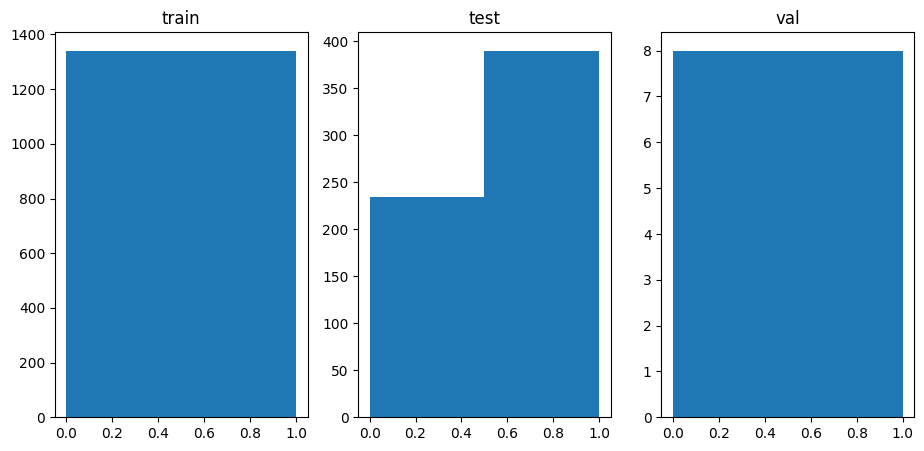

In [159]:
import seaborn as sns
plot_list=[y_train,y_test,y_val]
plot_names=['train','test','val']
fig=plt.figure(figsize=(15,5))
j=0
for i in range(1,4):
    fig.add_subplot(1,4,i)
    plt.hist(plot_list[j],bins=2)
    plt.title(plot_names[j])
    j+=1

# Normalize the data

In [160]:
x_train=x_train/255
x_test=x_test/255
x_val=x_val/255

# Plotting samples from the image

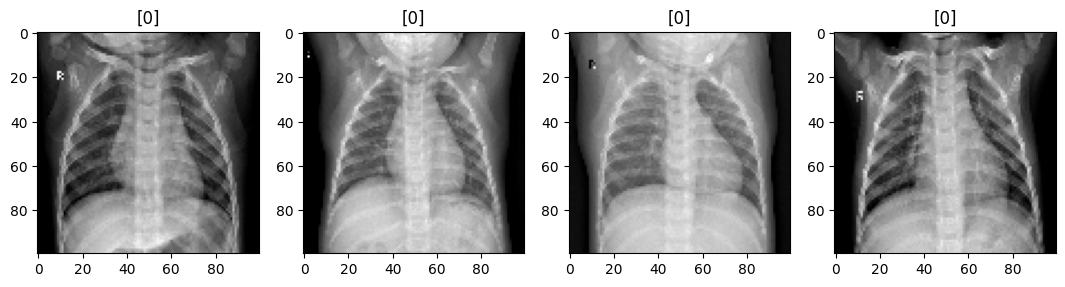

In [161]:
#plot sample images
fig=plt.figure(figsize=(20,20))
for i in range(1,5):
    fig.add_subplot(1,6,i)
    plt.imshow(x_train[i])
    plt.title(y_train[i])

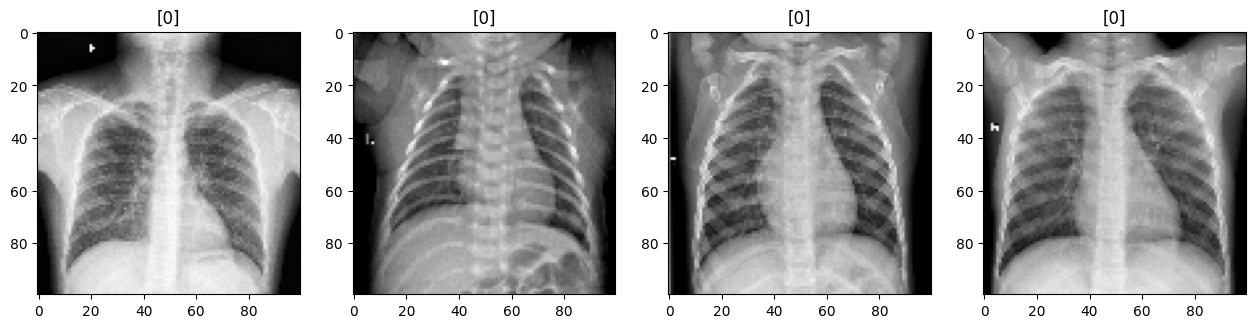

In [162]:
#plot sample images
fig=plt.figure(figsize=(40,40))
for i in range(1,5):
    fig.add_subplot(1,10,i)
    plt.imshow(x_train[1000+i])
    plt.title(y_train[1000+i])

# Try different Archeticture

## make custom CNN model

In [163]:
model = tf.keras.Sequential()
model.add(tf.keras.layers.Conv2D(32, (3, 3), activation='relu', input_shape=(100, 100, 3)))
model.add(tf.keras.layers.MaxPooling2D((3, 3)))
model.add(tf.keras.layers.Conv2D(64, (5, 5), activation='relu'))
model.add(tf.keras.layers.MaxPooling2D((3, 3)))
model.add(tf.keras.layers.Conv2D(64, (5, 5), activation='relu'))
model.add(tf.keras.layers.Flatten())
model.add(tf.keras.layers.Dense(64, activation='relu'))
model.add(tf.keras.layers.Dense(1,activation='sigmoid'))
model.summary()

Model: "sequential_17"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_24 (Conv2D)          (None, 98, 98, 32)        896       
                                                                 
 max_pooling2d_16 (MaxPooli  (None, 32, 32, 32)        0         
 ng2D)                                                           
                                                                 
 conv2d_25 (Conv2D)          (None, 28, 28, 64)        51264     
                                                                 
 max_pooling2d_17 (MaxPooli  (None, 9, 9, 64)          0         
 ng2D)                                                           
                                                                 
 conv2d_26 (Conv2D)          (None, 5, 5, 64)          102464    
                                                                 
 flatten_13 (Flatten)        (None, 1600)            

In [164]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.BinaryCrossentropy(from_logits=True),
              metrics=['accuracy'])

history = model.fit(x_train, y_train, epochs=10, 
                    validation_data=(x_val, y_val),batch_size=40,use_multiprocessing=True)


Epoch 1/10
68/68 [==============================] - 8s 108ms/step - loss: 0.4815 - accuracy: 0.7625 - val_loss: 0.5555 - val_accuracy: 0.6250
Epoch 2/10
68/68 [==============================] - 7s 108ms/step - loss: 0.2159 - accuracy: 0.9161 - val_loss: 0.8770 - val_accuracy: 0.6250
Epoch 3/10
68/68 [==============================] - 8s 111ms/step - loss: 0.1338 - accuracy: 0.9519 - val_loss: 0.9073 - val_accuracy: 0.5625
Epoch 4/10
68/68 [==============================] - 8s 118ms/step - loss: 0.0969 - accuracy: 0.9623 - val_loss: 0.2875 - val_accuracy: 0.8750
Epoch 5/10
68/68 [==============================] - 8s 117ms/step - loss: 0.0911 - accuracy: 0.9661 - val_loss: 0.4671 - val_accuracy: 0.8125
Epoch 6/10
68/68 [==============================] - 8s 114ms/step - loss: 0.0640 - accuracy: 0.9743 - val_loss: 1.1253 - val_accuracy: 0.5625
Epoch 7/10
68/68 [==============================] - 10s 142ms/step - loss: 0.1382 - accuracy: 0.9471 - val_loss: 0.1140 - val_accuracy: 1.0000
Epoch

20/20 [==============================] - 1s 30ms/step
[[150  84]
 [ 11 379]]


<Axes: >

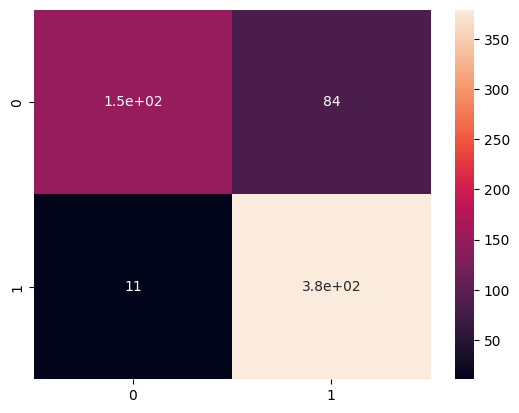

In [165]:
predicted_label=model.predict(x_test)
predicted_label=np.round(predicted_label)
predicted_label=predicted_label.astype(int)

from sklearn.metrics import confusion_matrix
cm=confusion_matrix(y_test,predicted_label)
print(cm)

import seaborn as sns
sns.heatmap(cm,annot=True)


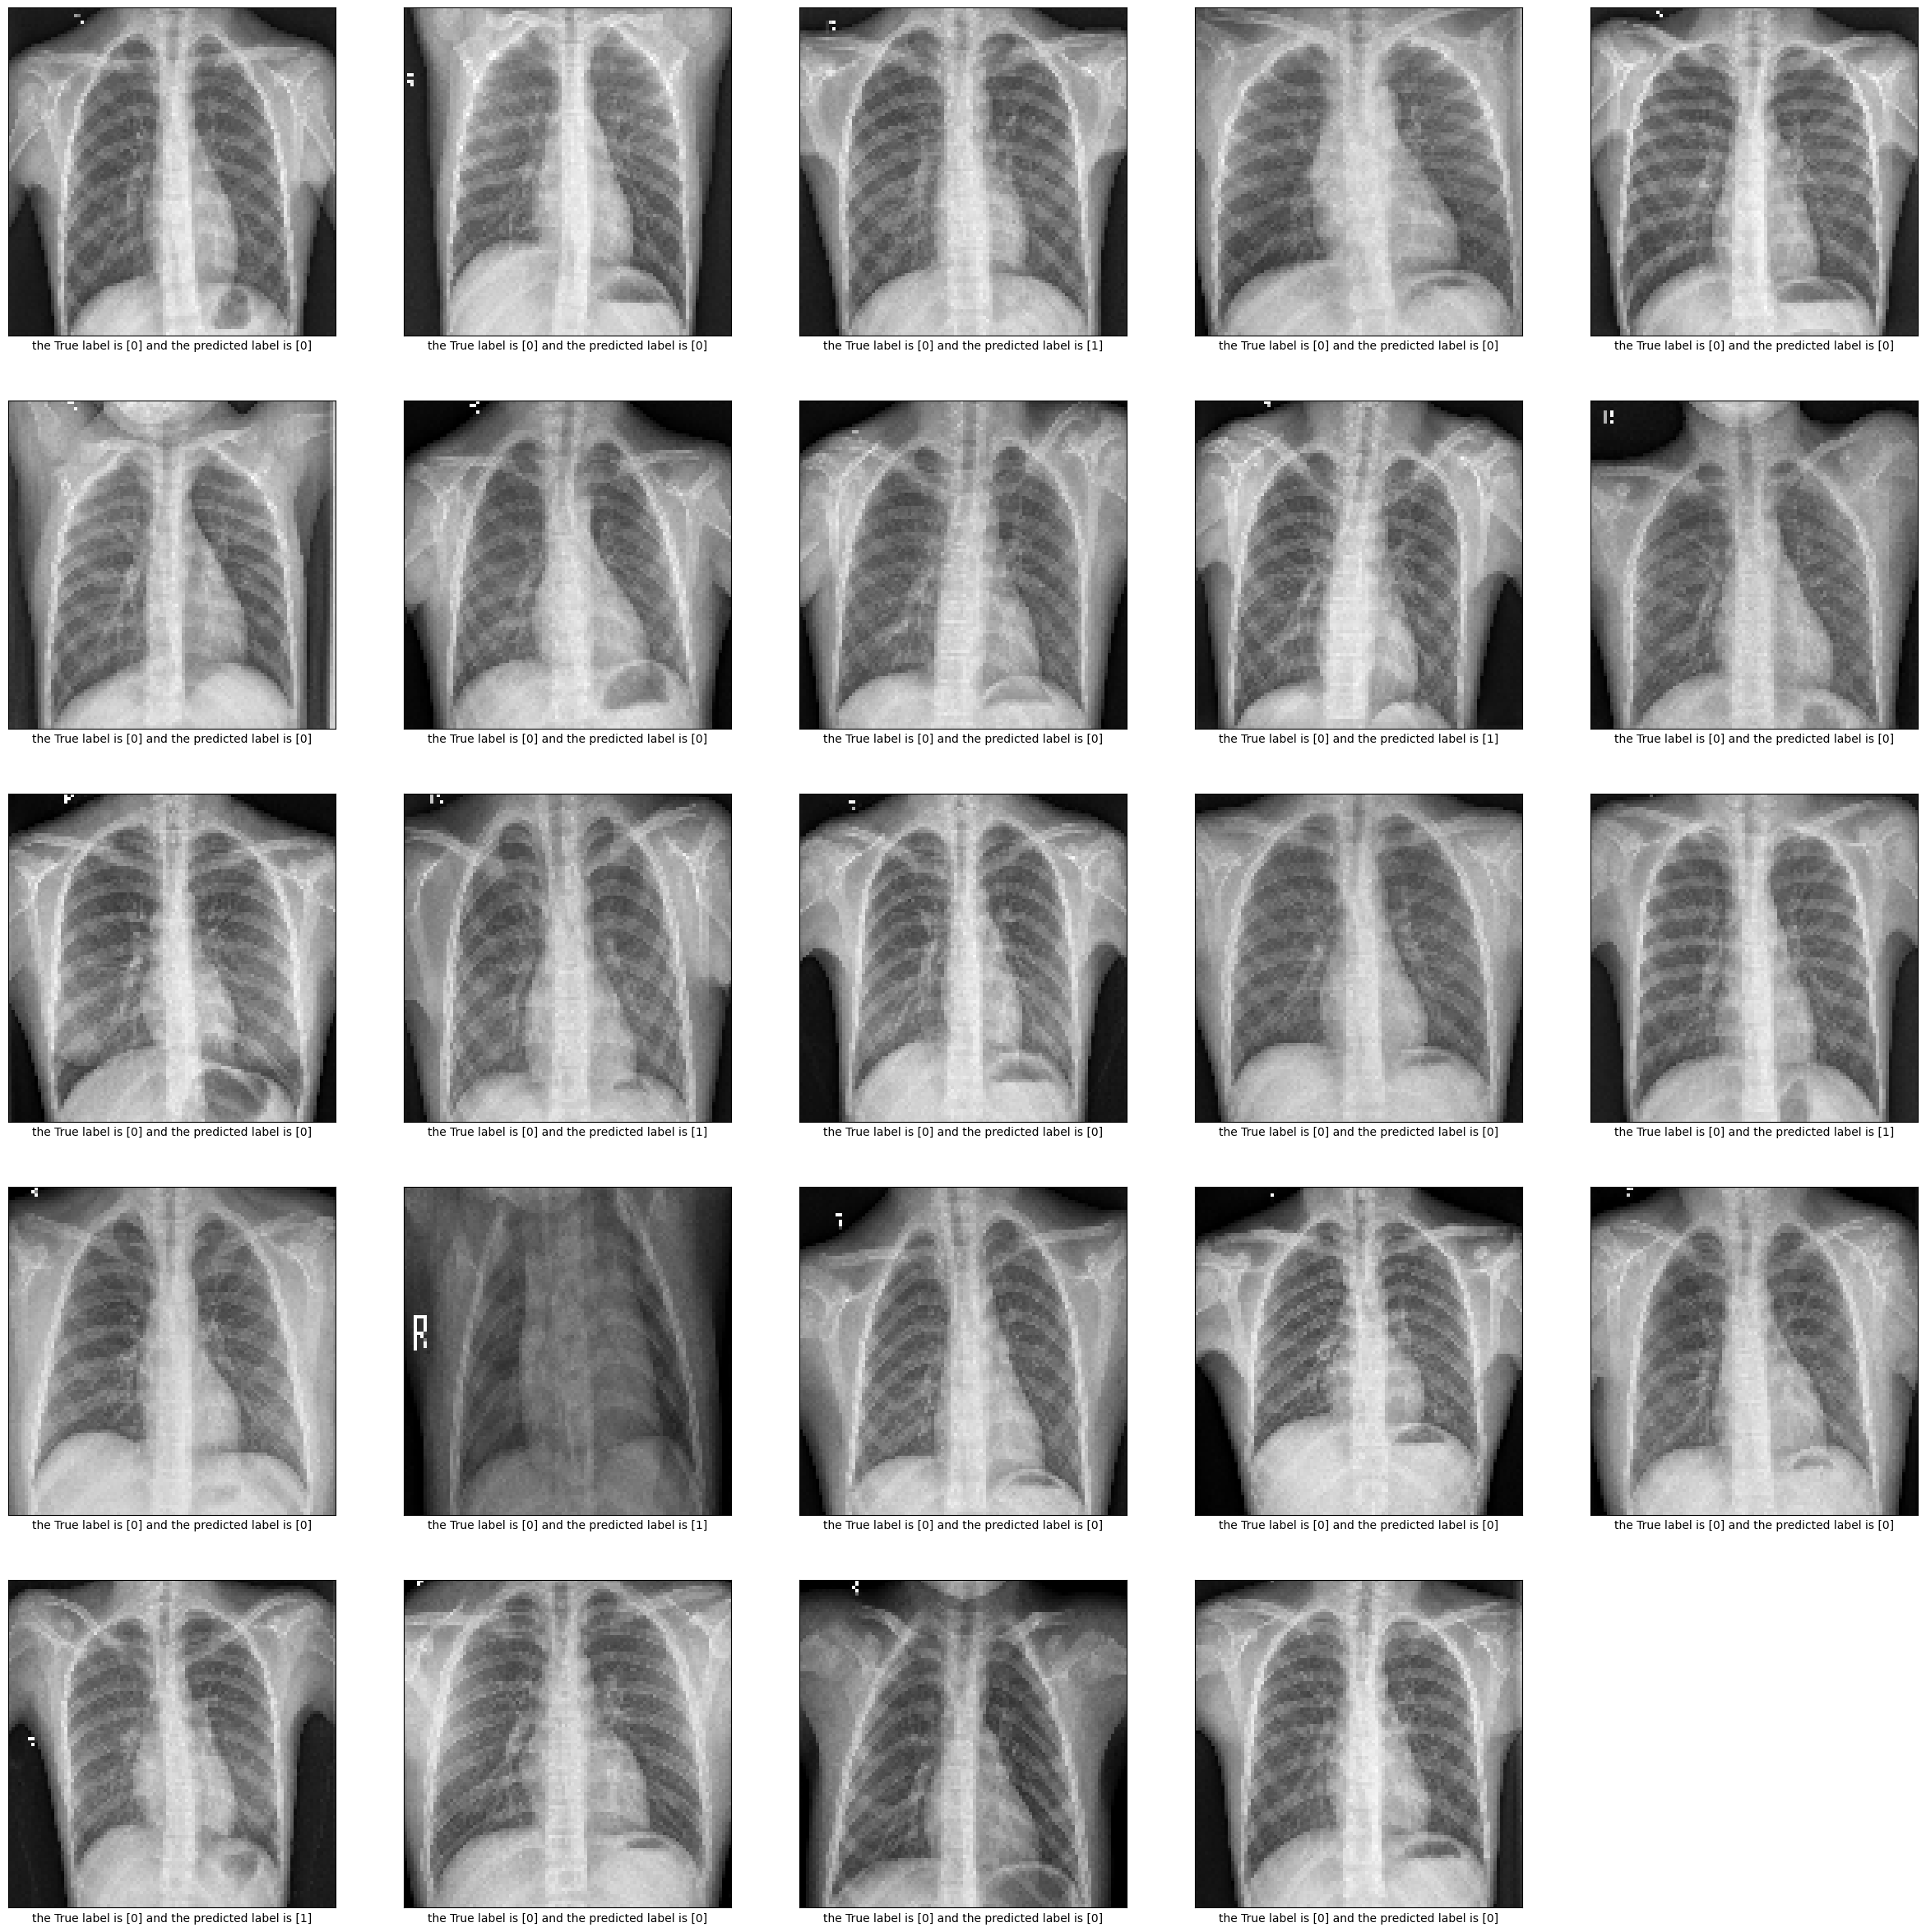

In [166]:
plt.figure(figsize=(30,30))
for i in range(24):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(x_test[i])
    # The CIFAR labels happen to be arrays, 
    # which is why you need the extra index
    plt.xlabel(f"the True label is {y_test[i]} and the predicted label is {predicted_label[i]}")
plt.show()

In [167]:
class estimator:
  _estimator_type = ''
  classes_=[]
  def __init__(self, model, classes):
    self.model = model
    self._estimator_type = 'classifier'
    self.classes_ = classes
  def predict(self, X):
    y_prob = self.model.predict(X)
    y_pred = y_prob.argmax(axis=1)
    return y_pred

classifier = estimator(model, [0,1])

## Use the pre-trained model VGG19

In [168]:
head = tf.keras.applications.VGG16(include_top=False,weights='imagenet',input_shape=(100,100,3))

for layer in head.layers:
    layer.trainable=False

model2 = tf.keras.Sequential()
model2.add(head)
model2.add(tf.keras.layers.Flatten())
model2.add(tf.keras.layers.Dense(64,activation='relu'))
model2.add(tf.keras.layers.Dense(1,activation='sigmoid'))
model2.summary()

Model: "sequential_18"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 vgg16 (Functional)          (None, 3, 3, 512)         14714688  
                                                                 
 flatten_14 (Flatten)        (None, 4608)              0         
                                                                 
 dense_28 (Dense)            (None, 64)                294976    
                                                                 
 dense_29 (Dense)            (None, 1)                 65        
                                                                 
Total params: 15009729 (57.26 MB)
Trainable params: 295041 (1.13 MB)
Non-trainable params: 14714688 (56.13 MB)
_________________________________________________________________


In [169]:
model2.compile(optimizer='adam',
              loss=tf.keras.losses.BinaryCrossentropy(from_logits=True),
              metrics=['accuracy'])

history2 = model2.fit(x_train, y_train, epochs=10, 
                    validation_data=(x_val, y_val),batch_size=40,use_multiprocessing=True)

Epoch 1/10


c:\Users\Ebrah\AppData\Local\Programs\Python\Python38\lib\site-packages\keras\src\backend.py:5805: UserWarning: "`binary_crossentropy` received `from_logits=True`, but the `output` argument was produced by a Sigmoid activation and thus does not represent logits. Was this intended?
  output, from_logits = _get_logits(


68/68 [==============================] - 57s 834ms/step - loss: 0.2155 - accuracy: 0.9124 - val_loss: 0.4880 - val_accuracy: 0.7500
Epoch 2/10
68/68 [==============================] - 55s 802ms/step - loss: 0.0974 - accuracy: 0.9650 - val_loss: 0.4680 - val_accuracy: 0.7500
Epoch 3/10
68/68 [==============================] - 57s 835ms/step - loss: 0.0815 - accuracy: 0.9739 - val_loss: 0.4017 - val_accuracy: 0.7500
Epoch 4/10
68/68 [==============================] - 55s 815ms/step - loss: 0.0631 - accuracy: 0.9795 - val_loss: 0.1887 - val_accuracy: 0.9375
Epoch 5/10
68/68 [==============================] - 56s 820ms/step - loss: 0.0524 - accuracy: 0.9810 - val_loss: 0.2254 - val_accuracy: 0.9375
Epoch 6/10
68/68 [==============================] - 57s 839ms/step - loss: 0.0466 - accuracy: 0.9851 - val_loss: 0.2747 - val_accuracy: 0.8750
Epoch 7/10
68/68 [==============================] - 55s 806ms/step - loss: 0.0368 - accuracy: 0.9873 - val_loss: 0.2053 - val_accuracy: 0.8750
Epoch 8/10

20/20 [==============================] - 13s 669ms/step
[[122 112]
 [  5 385]]


<Axes: >

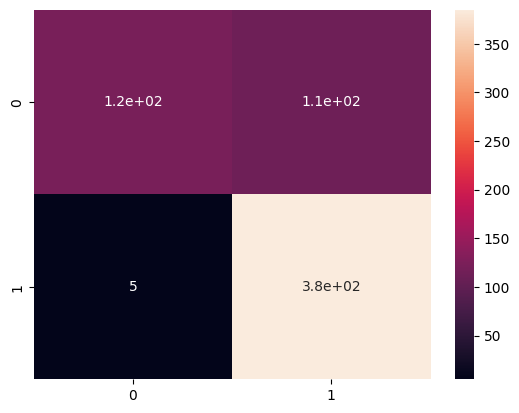

In [170]:
predicted_label=model2.predict(x_test)
predicted_label=np.round(predicted_label)
predicted_label=predicted_label.astype(int)

from sklearn.metrics import confusion_matrix
cm=confusion_matrix(y_test,predicted_label)
print(cm)

import seaborn as sns
sns.heatmap(cm,annot=True)


## Train the resnet model

In [171]:
head = tf.keras.applications.ResNet50(include_top=False,weights='imagenet',input_shape=(100,100,3))

for layer in head.layers:
    layer.trainable=False

model3 = tf.keras.Sequential()
model3.add(head)
model3.add(tf.keras.layers.Flatten())
model3.add(tf.keras.layers.Dense(1000,activation='relu'))
model3.add(tf.keras.layers.Dense(1,activation='sigmoid'))
model3.summary()

Model: "sequential_19"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 resnet50 (Functional)       (None, 4, 4, 2048)        23587712  
                                                                 
 flatten_15 (Flatten)        (None, 32768)             0         
                                                                 
 dense_30 (Dense)            (None, 1000)              32769000  
                                                                 
 dense_31 (Dense)            (None, 1)                 1001      
                                                                 
Total params: 56357713 (214.99 MB)
Trainable params: 32770001 (125.01 MB)
Non-trainable params: 23587712 (89.98 MB)
_________________________________________________________________


In [172]:
model3.compile(optimizer='adam',
              loss=tf.keras.losses.BinaryCrossentropy(from_logits=True),
              metrics=['accuracy'])

history3 = model3.fit(x_train, y_train, epochs=10, 
                    validation_data=(x_val, y_val),batch_size=40,use_multiprocessing=True)

Epoch 1/10


c:\Users\Ebrah\AppData\Local\Programs\Python\Python38\lib\site-packages\keras\src\backend.py:5805: UserWarning: "`binary_crossentropy` received `from_logits=True`, but the `output` argument was produced by a Sigmoid activation and thus does not represent logits. Was this intended?
  output, from_logits = _get_logits(


68/68 [==============================] - 47s 654ms/step - loss: 1.8627 - accuracy: 0.6312 - val_loss: 0.5883 - val_accuracy: 0.6250
Epoch 2/10
68/68 [==============================] - 44s 643ms/step - loss: 0.4520 - accuracy: 0.8121 - val_loss: 0.8944 - val_accuracy: 0.5625
Epoch 3/10
68/68 [==============================] - 44s 651ms/step - loss: 0.3941 - accuracy: 0.8397 - val_loss: 0.8009 - val_accuracy: 0.5625
Epoch 4/10
68/68 [==============================] - 43s 626ms/step - loss: 0.3761 - accuracy: 0.8345 - val_loss: 0.8784 - val_accuracy: 0.5625
Epoch 5/10
68/68 [==============================] - 43s 625ms/step - loss: 0.3285 - accuracy: 0.8729 - val_loss: 0.4911 - val_accuracy: 0.6875
Epoch 6/10
68/68 [==============================] - 43s 631ms/step - loss: 0.2837 - accuracy: 0.8934 - val_loss: 0.8064 - val_accuracy: 0.6250
Epoch 7/10
68/68 [==============================] - 43s 632ms/step - loss: 0.2531 - accuracy: 0.9057 - val_loss: 0.5978 - val_accuracy: 0.6875
Epoch 8/10

20/20 [==============================] - 9s 415ms/step
[[158  76]
 [ 35 355]]


<Axes: >

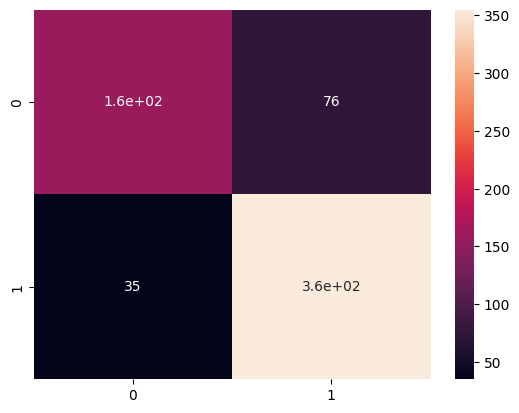

In [173]:
predicted_label=model3.predict(x_test)
predicted_label=np.round(predicted_label)
predicted_label=predicted_label.astype(int)

from sklearn.metrics import confusion_matrix
cm=confusion_matrix(y_test,predicted_label)
print(cm)

import seaborn as sns
sns.heatmap(cm,annot=True)

# Evaluate the models

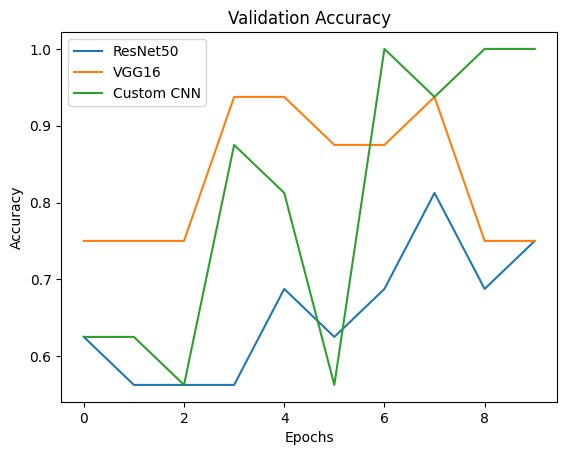

In [174]:
plt.plot(history3.history['val_accuracy'])
plt.plot(history2.history['val_accuracy'])
plt.plot(history.history['val_accuracy'])
plt.legend(['ResNet50','VGG16','Custom CNN'])
plt.title('Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.show()